In [1]:
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import natsort

In [6]:
class silhouette:
    def __init__(self, path): #tsne/umap
        self.path = path
        #self.algo = algo
    
    def list_dir(self):
        
        list_dir = os.listdir(self.path)
        list_dir = [f.lower() for f in list_dir] # Convert to lower case
        list_dir = natsort.natsorted(list_dir)

        return list_dir

    def sil(self):
        list_dir = obj_sil.list_dir()

        silh = np.array([])
        for filename in list_dir:
            if filename.endswith(('.csv')):
                df = pd.read_csv(self.path + filename)
                X = df[["a", "b"]]
                labels = df["c"]
                score = silhouette_score(X, labels, metric='euclidean', sample_size=None, random_state=None)
                silh = np.append(silh, score)
        return silh
    
    def plot_tsne(self):
        silh = obj_sil.sil()

        fig = plt.figure(figsize = (12, 5))
        ax = fig.add_axes([0,0,1,1])
        plt.axis([0, 101, -1, 0])
        #plt.axhline(y=-0.3,linewidth=1, color='tomato', linestyle = '--')
        per = [*range(1, len(silh)+1, 1)]
        # print(per)
        # print(silh)
        #plt.bar(per, silh, align = 'center', alpha=0.5)
        ax.bar(per, silh, color  = 'teal')
        #ax.ylim(-1, 0)
        ax.set_title("Silhouette scores for t-SNE simulations", fontweight='bold', fontsize = 14)
        ax.set_xlabel("Perplexity", fontweight='bold')
        ax.set_ylabel("Score", fontweight='bold')
        #plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
        #ax.grid()
        #ax.figure.savefig('mrna515/t-SNE_silhouette_scores.png', bbox_inches='tight', format = "png", dpi=1200)
        plt.show()
        np.savetxt("mrna515/sil_tsne.csv", silh, delimiter=",")

    def plot_umap(self):
        silh = obj_sil.sil()

        list1 = [2, 3, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70]
        list2 = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
        # using list comprehension  
        # to compute all possible permutations 
        res = [[i, j] for i in list1  
                        for j in list2]
        a = pd.DataFrame(res)
        b = pd.DataFrame(silh)
        df = pd.concat([a, b], axis=1)
        
        df.columns = [ 'no of neighbours', 'min_dis', 'score']
        print(df.head(15))
        df = df.pivot( 'min_dis', 'no of neighbours', 'score')
        

        fig, ax = plt.subplots()
        sns.set_context("paper")

        # Set title
        ax = sns.heatmap(df, linewidth=0.01) 
        ax.set_title("UMAP- Heatmap of siloutte scores")
        ax.figure.savefig('mrna515/UMAP_silhouette_scores.png', bbox_inches='tight', format = "png", dpi=1200)


    def run_sil(self, algo):
        if algo == "tsne":
            obj_sil.plot_tsne()
        elif algo == "umap":
            obj_sil.plot_umap()
        else:
            print("Invalid algorithm!")

no of neighbours  min_dis     score
0                  2     0.01 -0.509532
1                  2     0.05 -0.513158
2                  2     0.10 -0.482817
3                  2     0.20 -0.489317
4                  2     0.30 -0.490143
5                  2     0.40 -0.534896
6                  2     0.50 -0.497541
7                  2     0.60 -0.491727
8                  2     0.70 -0.459771
9                  2     0.80 -0.501110
10                 2     0.90 -0.500520
11                 3     0.01 -0.507009
12                 3     0.05 -0.516388
13                 3     0.10 -0.516465
14                 3     0.20 -0.545608


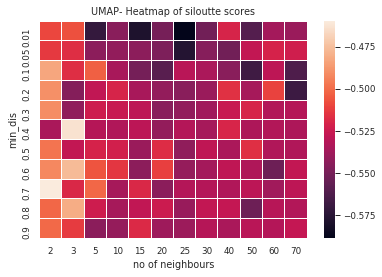

In [7]:
obj_sil = silhouette("mrna515/umap/")   #Enter path to data for umap or tsne
obj_sil.run_sil("umap")         #enter algorithm to use